In [2]:
import csv
import random
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from scipy.stats import linregress

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [4]:
with open("ecommerceDataset.csv") as csvfile:
    print(csvfile.readline())
    print(csvfile.readline())
    print(csvfile.readline())

Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for et

In [56]:
sents = []
labels = []

with open("ecommerceDataset.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        sents.append(row[1])
        labels.append(row[0])

In [57]:
sentences_and_labels = list(zip(sents, labels))

# Perform random sampling
random.seed(42)
sentences_and_labels = random.sample(sentences_and_labels,25000)

# Unpack back into separate lists
sentences, labels = zip(*sentences_and_labels)

print(f"There are {len(sentences)} sentences and {len(labels)} labels after random sampling\n")

There are 25000 sentences and 25000 labels after random sampling



In [58]:
# Create a dictionary to map labels to numerical values
label_to_num = {}
encoded_labels = []

# Iterate through the original labels
for label in labels:
    # Check if the label is already in the dictionary, if not, add it
    if label not in label_to_num:
        label_to_num[label] = len(label_to_num)
    # Append the numerical value to the numerical_labels list
    encoded_labels.append(label_to_num[label])
    
labels = encoded_labels

In [60]:
train_size = round(len(sentences) * 0.8)

# Split the sentences and labels into train/validation splits
train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

In [61]:
print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(validation_sentences)} sentences for validation.\n")
print(f"There are {len(validation_labels)} labels for validation.")

There are 20000 sentences for training.

There are 20000 labels for training.

There are 5000 sentences for validation.

There are 5000 labels for validation.


In [62]:
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(train_sentences)

In [63]:
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

In [64]:
train_seqs = tokenizer.texts_to_sequences(train_sentences)
val_seqs = tokenizer.texts_to_sequences(validation_sentences)

In [65]:
train_pad_sqs = pad_sequences(train_seqs,maxlen=40,padding="post",truncating="post")
val_pad_seqs = pad_sequences(val_seqs,maxlen=40,padding="post",truncating="post")

In [66]:
print(f"Padded and truncated training sequences have shape: {train_pad_sqs.shape}\n")
print(f"Padded and truncated validation sequences have shape: {val_pad_seqs.shape}")

Padded and truncated training sequences have shape: (20000, 40)

Padded and truncated validation sequences have shape: (5000, 40)


In [83]:
set(val_labels)

{0, 1, 2, 3}

In [74]:

train_labels = np.array(train_labels)
val_labels = np.array(validation_labels)

In [99]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(input_dim=VOCAB_SIZE,output_dim=32,input_length=40),
        tf.keras.layers.LSTM(64,return_sequences=True, dropout=.5),
        tf.keras.layers.LSTM(32, dropout=.5),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ]
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [100]:
history = model.fit(train_pad_sqs,train_labels,epochs=10, validation_data=(val_pad_seqs, val_labels))

Epoch 1/10


2023-09-24 17:14:32.627110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-24 17:14:32.814833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-24 17:14:32.870573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-24 17:14:33.209179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-24 17:14:33.320169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


623/625 [============================>.] - ETA: 0s - loss: 0.4887 - accuracy: 0.8289

2023-09-24 17:14:48.658855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-24 17:14:48.736726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-24 17:14:48.782790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 18s 27ms/step - loss: 0.4882 - accuracy: 0.8291 - val_loss: 0.2165 - val_accuracy: 0.9464
Epoch 2/10
625/625 [==============================] - 13s 21ms/step - loss: 0.1565 - accuracy: 0.9576 - val_loss: 0.1914 - val_accuracy: 0.9508
Epoch 3/10
625/625 [==============================] - 13s 21ms/step - loss: 0.0934 - accuracy: 0.9763 - val_loss: 0.1456 - val_accuracy: 0.9636
Epoch 4/10
625/625 [==============================] - 13s 21ms/step - loss: 0.0592 - accuracy: 0.9857 - val_loss: 0.1479 - val_accuracy: 0.9636
Epoch 5/10
625/625 [==============================] - 13s 20ms/step - loss: 0.0453 - accuracy: 0.9894 - val_loss: 0.1468 - val_accuracy: 0.9694
Epoch 6/10
625/625 [==============================] - 13s 20ms/step - loss: 0.0351 - accuracy: 0.9918 - val_loss: 0.1646 - val_accuracy: 0.9594
Epoch 7/10
625/625 [==============================] - 13s 20ms/step - loss: 0.0308 - accuracy: 0.9932 - val_loss: 0.1773 - val_accuracy: 0.9656
Epo

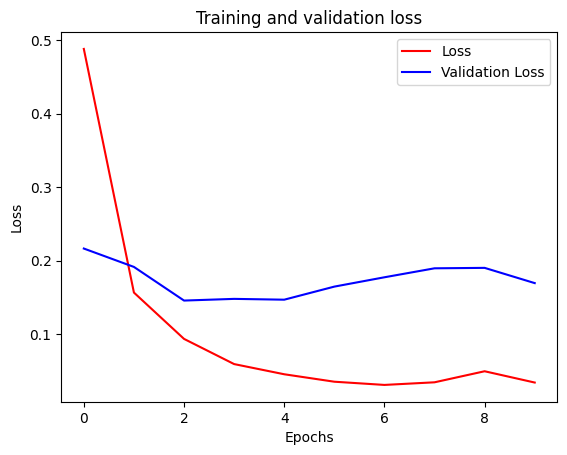

In [101]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [*range(10)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

In [102]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Test the slope of your val_loss curve. val_loss curve should be 0.0005 at maximum.
slope, *_ = linregress(epochs, val_loss)
print(f"The slope of your validation loss curve is {slope:.5f}")

The slope of your validation loss curve is -0.00065


In [97]:
 0.00202 > 0.0005

True